In [1]:
import cv2
import numpy as np

def nothing(x):
    # any operation
    pass
cap = cv2.VideoCapture(1)


lower_red = np.array([l_h, l_s, l_v])
upper_red = np.array([u_h, u_s, u_v])
mask = cv2.inRange(hsv, lower_red, upper_red)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.erode(mask, kernel)

NameError: name 'l_h' is not defined

In [2]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

KeyboardInterrupt: 

In [89]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Red color
    low_red = np.array([161, 155, 84])
    high_red = np.array([179, 255, 255])
    red_mask = cv2.inRange(hsv_frame, low_red, high_red)
    red = cv2.bitwise_and(frame, frame, mask=red_mask)

     # Blue color
    low_blue = np.array([94, 80, 2])
    high_blue = np.array([126, 255, 255])
    blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
    blue = cv2.bitwise_and(frame, frame, mask=blue_mask)

    # Green color
    low_green = np.array([25, 52, 72])
    high_green = np.array([102, 255, 255])
    green_mask = cv2.inRange(hsv_frame, low_green, high_green)
    green = cv2.bitwise_and(frame, frame, mask=green_mask)

    # Every color except white
    low = np.array([0, 42, 0])
    high = np.array([179, 255, 255])
    mask = cv2.inRange(hsv_frame, low, high)
    result = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow("Frame", frame)
    cv2.imshow("Red", red)
    cv2.imshow("Blue", blue)
    cv2.imshow("Green", green)
    cv2.imshow("Result", result)

    key = cv2.waitKey(1)
    if key == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
font = cv2.FONT_HERSHEY_COMPLEX

In [90]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
while True:
    _, frame = cap.read()
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)
    hsv = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([38, 86, 0])
    upper_blue = np.array([121, 255, 255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        
    for contour in contours:
        cv2.drawContours(frame, contour, -1, (0, 255, 0), 3)    
        
    cv2.imshow("Frame", frame)
    cv2.imshow("Mask", mask)
    key = cv2.waitKey(1)
    if key == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [4]:
import cv2
import numpy as np

diretorio = 'img/shapes1.png'

font = cv2.FONT_HERSHEY_COMPLEX
img = cv2.imread(diretorio, cv2.IMREAD_GRAYSCALE)
_, threshold = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    cv2.drawContours(img, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
#     print(approx.ravel())
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), font, 1, (0))
    elif len(approx) == 4:
        cv2.putText(img, "Rectangle", (x, y), font, 1, (0))
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), font, 1, (0))
    elif 6 < len(approx) < 15:
        cv2.putText(img, "Ellipse", (x, y), font, 1, (0))
    else:
        cv2.putText(img, "Circle", (x, y), font, 1, (0))

cv2.imshow("shapes", img)
cv2.imshow("Threshold", threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from rasterio.ima

In [5]:
import fiona
import rasterio.features

nome = 'cli23/ql/analises_jjkmpt_mosaicos_analise_134_data_56492_2020-09-06_iql.tif'

schema = {"geometry": "Polygon", "properties": {"value": "int"}}

with rasterio.open(nome) as raster:
    image = raster.read()
    # use your function to generate mask
    mask = your_thresholding_function(image)
    # and convert to uint8 for rasterio.features.shapes
    mask = mask.astype('uint8')
    shapes = rasterio.features.shapes(mask, transform=raster.transform)
    # select the records from shapes where the value is 1,
    # or where the mask was True
    records = [{"geometry": geometry, "properties": {"value": value}}
               for (geometry, value) in shapes if value == 1]
    saida = 'cli23/contorno.shp'
    with fiona.open(saida, "w", "ESRI Shapefile",
                    crs=raster.crs.data, schema=schema) as out_file:
        out_file.writerecords(records)

NameError: name 'your_thresholding_function' is not defined

In [45]:
# from skimage.draw import line, set_color
import rasterio as rio
from rasterio.plot import show
import matplotlib as plt
import cv2
import numpy as np

In [41]:
# img = np.zeros((10, 10), dtype=np.uint8)
nome = 'cli23/ql/analises_jjkmpt_mosaicos_analise_134_data_56413_2020-03-05_iql.tif'
with rio.open(nome) as raster:
    image = raster.read()
src = rio.open(nome)

In [74]:
img.shape
# src.dtypes
# src.nodata

(6101, 8692)

In [15]:
msk = src.read_masks(1)

In [16]:
msk.shape

(6101, 8692)

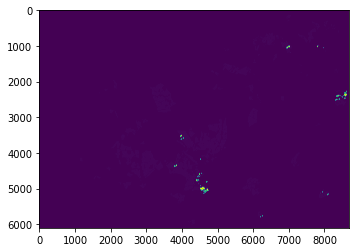

<AxesSubplot:>

In [42]:
show((image), cmap='viridis')

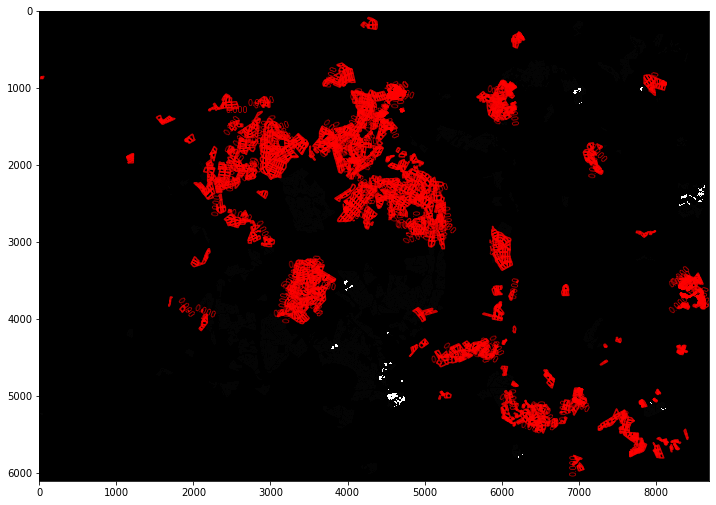

In [53]:
fig, ax = plt.pyplot.subplots(1, figsize=(12, 12))
show((image), cmap='Greys_r', interpolation='none', ax=ax)
show(image, contour=True, ax=ax)
plt.pyplot.show()

In [92]:
img = cv2.imread(nome, 1)
cv2.imshow("Result Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [78]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.4.0) /tmp/pip-req-build-cg56sov1/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [82]:
edges = cv2.Canny(img, 50, 200)
lines = cv2.HoughLinesP(img, 1, np.pi/180, 100, minLineLength=100, maxLineGap=250)
print(lines)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(src.read(), (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result
cv2.imshow("Result Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[3777 4576 5245 3108]]

 [[7464  869 8022  311]]

 [[3653 4560 5128 3085]]

 ...

 [[1839 2245 2108 2197]]

 [[3242 2540 3705 2424]]

 [[6071 1019 6268  775]]]


In [77]:
cv2.imshow("Result Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [75]:
cv2.imshow("Result Image", img)